In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report



# 1. Getting aquainted with the dataset

- `ÌD`: is like a name.

- `Book_length(mins)_overall`: is the sum of the lengths of purchases.

- `Book_length(mins)_avg`: is the sum of the lengths of purchases divided by the number of purchases. Notice we don't need the number of purchases column because we ca get it from `Book_length(mins)_overall` / `Book_length(mins)_avg`.

- `Price_overall` & `Price_avg`: Same as Book length, the price variable is almost always a good predictor.

- `Review`: is boolean. It shows if the customer left a review. If so, `Review10/10` saves the review left by the user. While most users don't left a review we fill the missing reviews by avrage review column.

- `Minutes_listened`: is a measure of engagement, the total of minutes the user listen to audiobooks.

- `Completion`: is the `Minutes_listened` / `Book_length(mins)_overall`.

- `Support_Request`: Shows the total number of support request (forgotten password to assistance).

- `Last_Visited_mins_Purchase_date`: the bigger the difference, the bigger sooner the engagement. If the value is 0, we are sure the customer has never accessed what he/she has bought.

The data was gathered from the audiobook app, the input data represents `2 years` worth of engagement. We are doing supervised learning so we need `target`. We took extra `6 month` to check if the user converted or not. 1 if the customer buys in the next 6 months, 0 if the customer didn't.

- `target`: 1 if the customer bought again in the last 6 months of data. 0 if the customer did not buy again.

In [4]:
data = pd.read_csv("audiobook_data_2.csv", index_col=0)
data.head()

,Book_length(mins)_overall,Book_length(mins)_avg,Price_overall,Price_avg,Review,Review10/10,Completion,Minutes_listened,Support_Request,Last_Visited_mins_Purchase_date,Target
994,1620.0,1620,19.73,19.73,1,10.00,0.99,1603.8,5,92,0
1143,2160.0,2160,5.33,5.33,0,8.91,0.00,0.0,0,0,0
2059,2160.0,2160,5.33,5.33,0,8.91,0.00,0.0,0,388,0
2882,1620.0,1620,5.96,5.96,0,8.91,0.42,680.4,1,129,0
3342,2160.0,2160,5.33,5.33,0,8.91,0.22,475.2,0,361,0


# 2. Exploratory Data Analysis

## `Book_length(mins)_overall` & `Book_length(mins)_avg`

- `Book_length(mins)_overall`: is the sum of the lengths of purchases.

- `Book_length(mins)_avg`: is the sum of the lengths of purchases divided by the number of purchases. Notice we don't need the number of purchases column because we ca get it from `Book_length(mins)_overall` / `Book_length(mins)_avg`.

In [5]:
data['Book_length(mins)_overall'][:150].value_counts()  #14084

2160.0    79
1620.0    32
648.0     11
1080.0     8
324.0      7
1404.0     3
540.0      3
1188.0     2
1242.0     1
1890.0     1
756.0      1
1332.0     1
594.0      1
Name: Book_length(mins)_overall, dtype: int64

In [6]:
def book_length(length):
    if length > 1200:
        return 1
    else:
        return 0
    
data['purchases_hour_>3h'] = data['Book_length(mins)_overall'].apply(book_length)

In [7]:
data['Book_length(mins)_avg'].apply(book_length).value_counts()

1    9480
0    4604
Name: Book_length(mins)_avg, dtype: int64

In [8]:
data['purchases_hour_>3h'].value_counts()

1    9317
0    4767
Name: purchases_hour_>3h, dtype: int64

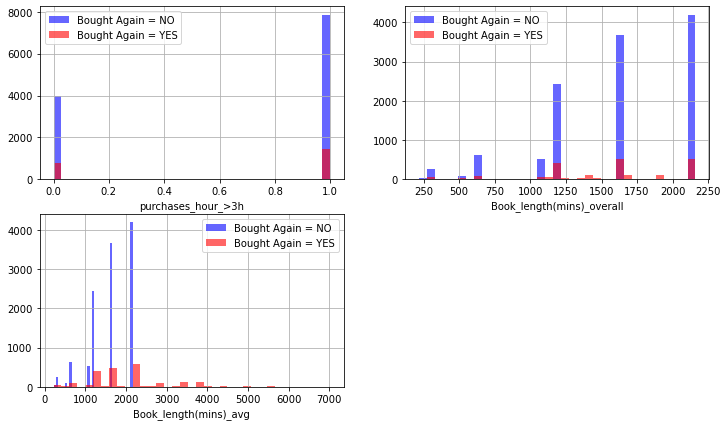

In [9]:
columns = ['purchases_hour_>3h', 'Book_length(mins)_overall', 'Book_length(mins)_avg']
plt.figure(figsize=(12, 7))

for i, column in enumerate(columns, 1):
    plt.subplot(2, 2, i)
    data[data["Target"] == 0][column].hist(bins=35, color='blue', label='Bought Again = NO', alpha=0.6)
    data[data["Target"] == 1][column].hist(bins=35, color='red', label='Bought Again = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

## `Price_overall` & `Price_avg`

- `Price_overall` & `Price_avg`: Same as Book length, the price variable is almost always a good predictor.

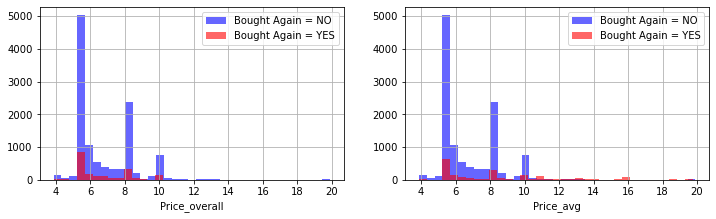

In [10]:
columns = ["Price_overall", "Price_avg"]
plt.figure(figsize=(12, 7))
df = data[(data.Price_overall < 20) & (data.Price_avg < 20)]

for i, column in enumerate(columns, 1):
    plt.subplot(2, 2, i)
    df[df["Target"] == 0][column].hist(bins=35, color='blue', label='Bought Again = NO', alpha=0.6)
    df[df["Target"] == 1][column].hist(bins=35, color='red', label='Bought Again = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

## `Review` & `Review10/10`
- `Review`: is boolean. It shows if the customer left a review. If so, `Review10/10` saves the review left by the user. While most users don't left a review we fill the missing reviews by avrage review column.

In [11]:
print(data[data['Review'] == 0].Target.value_counts(normalize=True))
print(data[data['Review'] == 1].Target.value_counts(normalize=True))

0    0.843063
1    0.156937
Name: Target, dtype: float64
0    0.831272
1    0.168728
Name: Target, dtype: float64


In [12]:
data['Review10/10'][:150].value_counts()

8.91     120
10.00     13
8.00       7
9.00       6
7.00       2
6.50       1
5.00       1
Name: Review10/10, dtype: int64

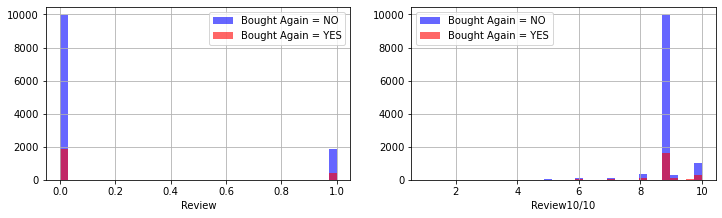

In [13]:
columns = ["Review", "Review10/10"]
plt.figure(figsize=(12, 7))

for i, column in enumerate(columns, 1):
    plt.subplot(2, 2, i)
    data[data["Target"] == 0][column].hist(bins=35, color='blue', label='Bought Again = NO', alpha=0.6)
    data[data["Target"] == 1][column].hist(bins=35, color='red', label='Bought Again = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

## `Minutes_listened` & `Completion`
- `Minutes_listened`: is a measure of engagement, the total of minutes the user listen to audiobooks.
- `Completion`: is the `Minutes_listened` / `Book_length(mins)_overall`.

In [14]:
def listened_to_books(minutes):
    if minutes > 0.0:
        return 0
    else:
        return 1
data['listened_to_books'] = data.Minutes_listened.apply(listened_to_books)

In [15]:
def completion_state(minutes):
    if minutes > 0.5:
        return 1
    else:
        return 0
data['completion_state'] = data.Completion.apply(completion_state)

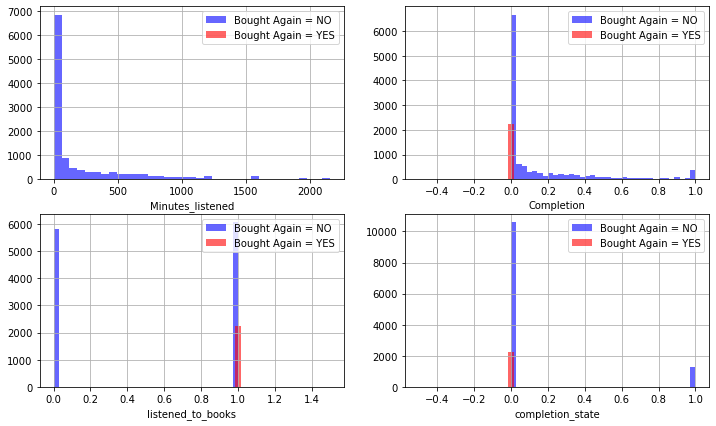

In [16]:
columns = ["Minutes_listened", "Completion", "listened_to_books", "completion_state"]
plt.figure(figsize=(12, 7))

for i, column in enumerate(columns, 1):
    plt.subplot(2, 2, i)
    data[data["Target"] == 0][column].hist(bins=35, color='blue', label='Bought Again = NO', alpha=0.6)
    data[data["Target"] == 1][column].hist(bins=35, color='red', label='Bought Again = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

In [17]:
data.drop('Minutes_listened', axis=1, inplace=True)

## `Support_Request` & `Last_Visited_mins_Purchase_date`

- `Support_Request`: Shows the total number of support request (forgotten password to assistance).
- `Last_Visited_mins_Purchase_date`: the bigger the difference, the bigger sooner the engagement. If the value is 0, we are sure the customer has never accessed what he/she has bought.

In [18]:
def asked_for_request(request):
    if request == 0:
        return 0
    else:
        return 1
    
data["asked_for_request"] = data.Support_Request.apply(asked_for_request)

In [19]:
def acc_purchases(purchase):
    if purchase == 0:
        return 0
    else:
        return 1
data['acc_purchases'] = data.Last_Visited_mins_Purchase_date.apply(acc_purchases)

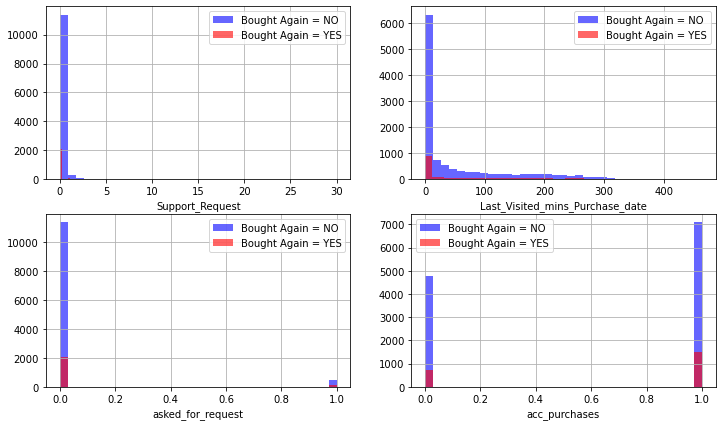

In [20]:
columns = ["Support_Request", "Last_Visited_mins_Purchase_date", "asked_for_request", "acc_purchases"]
plt.figure(figsize=(12, 7))

for i, column in enumerate(columns, 1):
    plt.subplot(2, 2, i)
    data[data["Target"] == 0][column].hist(bins=35, color='blue', label='Bought Again = NO', alpha=0.6)
    data[data["Target"] == 1][column].hist(bins=35, color='red', label='Bought Again = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

<AxesSubplot:>

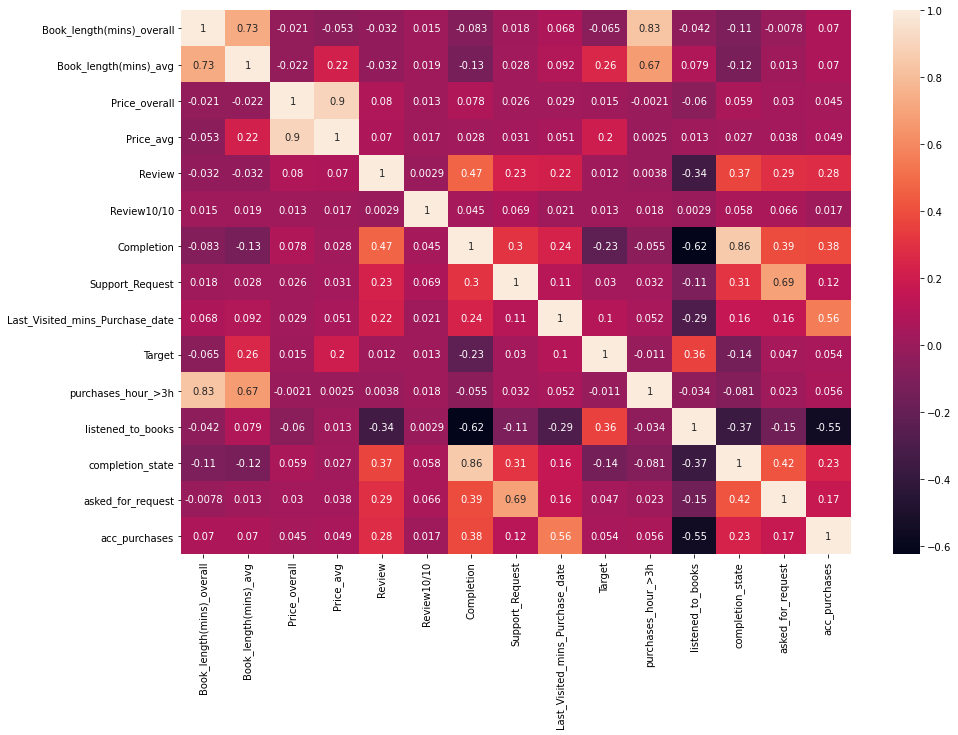

In [21]:
plt.figure(figsize=(15, 10))
sns.heatmap(data.corr(), annot=True)

In [22]:
data.describe()

,Book_length(mins)_overall,Book_length(mins)_avg,Price_overall,Price_avg,Review,Review10/10,Completion,Support_Request,Last_Visited_mins_Purchase_date,Target,purchases_hour_>3h,listened_to_books,completion_state,asked_for_request,acc_purchases
count,14084.000000,14084.000000,14084.000000,14084.000000,14084.000000,14084.000000,14084.000000,14084.000000,14084.000000,14084.000000,14084.000000,14084.000000,14084.000000,14084.000000,14084.000000
mean,1591.281685,1678.608634,7.103791,7.543805,0.160750,8.909795,0.125659,0.070222,61.935033,0.158833,0.661531,0.588966,0.088895,0.043809,0.609983
std,504.340663,654.838599,4.931673,5.560129,0.367313,0.643406,0.241206,0.472157,88.207634,0.365533,0.473206,0.492039,0.284603,0.204676,0.487771
min,216.000000,216.000000,3.860000,3.860000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1188.000000,1188.000000,5.330000,5.330000,0.000000,8.910000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1620.000000,1620.000000,5.950000,6.070000,0.000000,8.910000,0.000000,0.000000,11.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000
75%,2160.000000,2160.000000,8.000000,8.000000,0.000000,8.910000,0.130000,0.000000,105.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,2160.000000,7020.000000,130.940000,130.940000,1.000000,10.000000,1.000000,30.000000,464.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# After Partial Cleaning Data and Removing Nan Values 

Shape of Dataset
(14084, 15)

unique elements in Features

Book_length(mins)_overall           60
Book_length(mins)_avg               58
Price_overall                      349
Price_avg                          476
Review                               2
Review10/10                         24
Completion                         101
Support_Request                     12
Last_Visited_mins_Purchase_date    371
Target                               2
purchases_hour_>3h                   2
listened_to_books                    2
completion_state                     2
asked_for_request                    2
acc_purchases                        2
dtype: int64

duplicated Series values
4734

About Features : 

Book_length(mins)_overall          100.0
Book_length(mins)_avg              100.0
Price_overall                      100.0
Price_avg                          100.0
Review                             100.0
Review10/10                        100.0
Completion                         100.0
Suppo

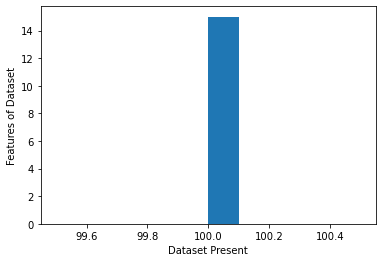

In [23]:
df = data
print("Shape of Dataset")
print(df.shape)
print()
print("unique elements in Features")
print()
print(df.nunique())
print()
print("duplicated Series values")
print(df.duplicated().sum())
print()
print("About Features : ")
print()
print(df.count()/df.isna().count()*100)
x=df.count()/df.isna().count()*100
plt.hist(x)
plt.ylabel("Features of Dataset")
plt.xlabel("Dataset Present")
plt.show()

### duplicated Series values  4734

# 3. Data Pre-processing

Since we are dealing with real life data, we will need to preprocess it a bit. This is the relevant code which is not that hard but refers to data engineering more than machine learning.

- Handling categorical features

- Balance the dataset. 

In [24]:
print(f"Data shape before removing duplicates: {data.shape}")

# Remove duplicate Features
data = data.T.drop_duplicates()
data = data.T

# Remove Duplicate Rows
data.drop_duplicates(inplace=True)

print(f"Data shape after removing duplicates: {data.shape}")

Data shape before removing duplicates: (14084, 15)
Data shape after removing duplicates: (9350, 15)


In [25]:
print(f"{data.Target.value_counts()}")
print(f"{data.Target.value_counts()[0] / data.Target.value_counts()[1]}")

0.0    7548
1.0    1802
Name: Target, dtype: int64
4.188679245283019


In [26]:
from sklearn.model_selection import train_test_split
X = data.drop('Target', axis=1)
y = data.Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [27]:
print(f"Train shape: {X_train.shape}")
print(f"Test shape: {X_test.shape}")

Train shape: (6545, 14)
Test shape: (2805, 14)


In [28]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='liblinear', penalty='l2')
model.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

### liblinear — Library for Large Linear Classification. Uses a coordinate descent algorithm. Coordinate descent is based on minimizing a multivariate function by solving univariate optimization problems in a loop. <br> 
## (it moves toward the minimum in one direction at a time)

## to reduce the chance of model overfitting

### A regression model that uses L1 regularization technique is called Lasso Regression and model which uses L2 is called Ridge Regression. The key difference between these two is the penalty term. Ridge regression adds “squared magnitude” of coefficient as penalty term to the loss function.


In [29]:
model.score(X_test, y_test)

0.8980392156862745

In [30]:
ypred = model.predict(X_test)

In [31]:
ypred[:100]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

## Here you can see the 13, 18 value is 1 and below the Probability Will Buy is More than 50% 

In [32]:
print("Not Buy     |   Will Buy ")
print(model.predict_proba(X_test[:20]/100) )

Not Buy     |   Will Buy 
[[0.8644563  0.1355437 ]
 [0.87022153 0.12977847]
 [0.87033879 0.12966121]
 [0.86818737 0.13181263]
 [0.87106293 0.12893707]
 [0.87088602 0.12911398]
 [0.87121576 0.12878424]
 [0.86476048 0.13523952]
 [0.86603376 0.13396624]
 [0.8712653  0.1287347 ]
 [0.87050675 0.12949325]
 [0.86486186 0.13513814]
 [0.87118391 0.12881609]
 [0.80617105 0.19382895]
 [0.86484441 0.13515559]
 [0.87063731 0.12936269]
 [0.87087364 0.12912636]
 [0.87080253 0.12919747]
 [0.81718765 0.18281235]
 [0.87071635 0.12928365]]


In [33]:

def evaluate(model, X_train, X_test, y_train, y_test):
    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)

    print("TRAINIG RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_train, y_train_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_train, y_train_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_train, y_train_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

    print("TESTING RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_test, y_test_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_test, y_test_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_test, y_test_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

In [34]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(solver='liblinear', penalty='l2')
lr_clf.fit(X_train, y_train)

evaluate(lr_clf, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[5228   43]
 [ 624  650]]
ACCURACY SCORE:
0.8981
CLASSIFICATION REPORT:
                   0.0          1.0  accuracy    macro avg  weighted avg
precision     0.893370     0.937951   0.89809     0.915660      0.902048
recall        0.991842     0.510204   0.89809     0.751023      0.898090
f1-score      0.940034     0.660905   0.89809     0.800470      0.885701
support    5271.000000  1274.000000   0.89809  6545.000000   6545.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[2253   24]
 [ 262  266]]
ACCURACY SCORE:
0.8980
CLASSIFICATION REPORT:
                   0.0         1.0  accuracy    macro avg  weighted avg
precision     0.895825    0.917241  0.898039     0.906533      0.899856
recall        0.989460    0.503788  0.898039     0.746624      0.898039
f1-score      0.940317    0.650367  0.898039     0.795342      0.885738
support    2277.000000  528.000000  0.898039  2805.000000   2805.000000


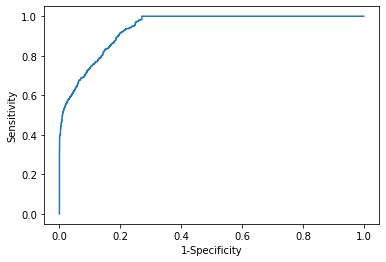

In [35]:
#Logisitic Regression
y_pred_proba = lr_clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

plt.plot(fpr,tpr)
plt.ylabel('Sensitivity')  #True Positive Rate
plt.xlabel('1-Specificity')  #False Positive Rate
plt.show()

In [39]:
y_pred = lr_clf.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(lr_clf.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.90


In [62]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[2253   24]
 [ 262  266]]


<AxesSubplot:>

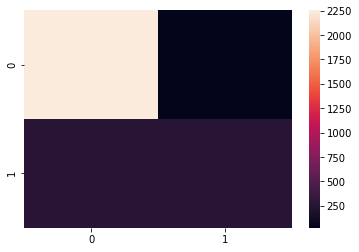

In [63]:
sns.heatmap(confusion_matrix)


In [42]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.90      0.99      0.94      2277
         1.0       0.92      0.50      0.65       528

    accuracy                           0.90      2805
   macro avg       0.91      0.75      0.80      2805
weighted avg       0.90      0.90      0.89      2805



In [44]:
from sklearn.metrics import precision_recall_curve
y_score = lr_clf.predict_proba(X_test)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, y_score)


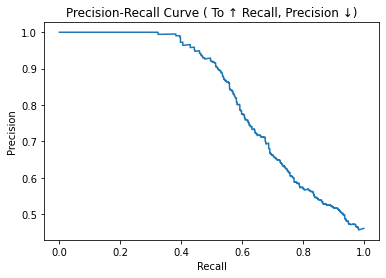

In [53]:
plt.plot(recall, precision)

# tradeoff b/w Precision & Recall
plt.title('Precision-Recall Curve ( To ↑ Recall, Precision ↓)')
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show()

SyntaxError: invalid syntax (<ipython-input-54-11e2111f1ef0>, line 1)